In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
dados = pd.read_csv("tabela_aluguel_completa.csv")
dados.head()

,Unnamed: 0,Tipo,Dormitórios,Banheiros,Garagens,Bairro,Valor,Suítes,Mobiliado
0,0,Apartamento Padrão,1,1,2,Jardim Paraíso,1750.00,0,Sim
1,1,Casa Padrão,3,1,3,Jardim Embaré,2083.75,1,Não
2,2,Apartamento Padrão,2,1,1,Vila Celina,1667.50,0,Não
3,3,Casa Padrão,1,1,1,Jardim Social Presidente Collor,695.00,0,Não
4,4,Casa Padrão,3,1,1,Vila Faria,2778.75,1,Sim


In [159]:
df = dados.copy()
df.drop(columns="Unnamed: 0", inplace=True)
df.head()

,Tipo,Dormitórios,Banheiros,Garagens,Bairro,Valor,Suítes,Mobiliado
0,Apartamento Padrão,1,1,2,Jardim Paraíso,1750.00,0,Sim
1,Casa Padrão,3,1,3,Jardim Embaré,2083.75,1,Não
2,Apartamento Padrão,2,1,1,Vila Celina,1667.50,0,Não
3,Casa Padrão,1,1,1,Jardim Social Presidente Collor,695.00,0,Não
4,Casa Padrão,3,1,1,Vila Faria,2778.75,1,Sim


In [160]:
df.shape, df.dtypes

((1392, 8),
 Tipo            object
 Dormitórios      int64
 Banheiros        int64
 Garagens         int64
 Bairro          object
 Valor          float64
 Suítes           int64
 Mobiliado       object
 dtype: object)

In [161]:
df.duplicated().sum()

224

In [162]:
df.drop_duplicates(inplace=True)

In [163]:
df['Bairro'] = df['Bairro'].str.lstrip()
df.head()

,Tipo,Dormitórios,Banheiros,Garagens,Bairro,Valor,Suítes,Mobiliado
0,Apartamento Padrão,1,1,2,Jardim Paraíso,1750.00,0,Sim
1,Casa Padrão,3,1,3,Jardim Embaré,2083.75,1,Não
2,Apartamento Padrão,2,1,1,Vila Celina,1667.50,0,Não
3,Casa Padrão,1,1,1,Jardim Social Presidente Collor,695.00,0,Não
4,Casa Padrão,3,1,1,Vila Faria,2778.75,1,Sim


In [164]:
df['Tipo']= df['Tipo'].astype('category')
df['Bairro']= df['Bairro'].astype('category')
df['Mobiliado']= df['Mobiliado'].astype('category')

In [165]:
df.shape, df.dtypes

((1168, 8),
 Tipo           category
 Dormitórios       int64
 Banheiros         int64
 Garagens          int64
 Bairro         category
 Valor           float64
 Suítes            int64
 Mobiliado      category
 dtype: object)

In [166]:
df['Valor_final'] = df['Valor']*0.8
df.head()

,Tipo,Dormitórios,Banheiros,Garagens,Bairro,Valor,Suítes,Mobiliado,Valor_final
0,Apartamento Padrão,1,1,2,Jardim Paraíso,1750.00,0,Sim,1400.0
1,Casa Padrão,3,1,3,Jardim Embaré,2083.75,1,Não,1667.0
2,Apartamento Padrão,2,1,1,Vila Celina,1667.50,0,Não,1334.0
3,Casa Padrão,1,1,1,Jardim Social Presidente Collor,695.00,0,Não,556.0
4,Casa Padrão,3,1,1,Vila Faria,2778.75,1,Sim,2223.0


In [167]:
df.loc[df['Valor_final'] > 10000]

,Tipo,Dormitórios,Banheiros,Garagens,Bairro,Valor,Suítes,Mobiliado,Valor_final
159,Casa Padrão,5,2,5,Centro,13890.00,2,Sim,11112.0
514,Casa Padrão,5,3,1,Centro,20833.75,0,Sim,16667.0
598,Casa Padrão,4,2,10,Centro,15000.00,2,Não,12000.0
724,Casa Condomínio,5,2,6,Broa,16750.00,4,Sim,13400.0
835,Casa Padrão,5,6,4,Centro,48611.25,4,Não,38889.0
1249,Casa Padrão,3,6,6,Jardim Sao Carlos,15000.00,0,Sim,12000.0


In [168]:
df.drop('Valor', axis=1, inplace=True)
df.head()

,Tipo,Dormitórios,Banheiros,Garagens,Bairro,Suítes,Mobiliado,Valor_final
0,Apartamento Padrão,1,1,2,Jardim Paraíso,0,Sim,1400.0
1,Casa Padrão,3,1,3,Jardim Embaré,1,Não,1667.0
2,Apartamento Padrão,2,1,1,Vila Celina,0,Não,1334.0
3,Casa Padrão,1,1,1,Jardim Social Presidente Collor,0,Não,556.0
4,Casa Padrão,3,1,1,Vila Faria,1,Sim,2223.0


In [169]:
df['Tipo'].value_counts()

Apartamento Padrão          584
Casa Padrão                 385
Casa Condomínio              65
Casa Sobrado                 46
Apartamento Kitnet           45
Apartamento Kitchnet ...     10
Apartamento Cobertura         8
Casa Edícula                  8
Apartamento Duplex            5
Apartamento Flat com ...      5
Apartamento Apartamen...      4
Apartamento Flat              2
Apartamento Flat sem ...      1
Name: Tipo, dtype: int64

In [170]:
#vai ser necessário padronizar os tipos 

df['Tipo'].replace(['Apartamento Flat com ...', 'Apartamento Apartamento ...', 'Apartamento Studio', 
'Apartamento Duplex', 'Apartamento Cobertura', 'Apartamento Padrão', 'Apartamento Kitchnet ...', 'Apartamento Flat sem ...',
'Apartamento Kitnet', 'Apartamento Apartamen...', 'Apartamento Flat'], ['Apartamento', 'Apartamento', 'Apartamento', 'Apartamento', 'Apartamento', 'Apartamento', 
'Apartamento', 'Apartamento', 'Apartamento', 'Apartamento', 'Apartamento'], inplace=True)

In [171]:
df['Tipo'].value_counts()

Apartamento        664
Casa Padrão        385
Casa Condomínio     65
Casa Sobrado        46
Casa Edícula         8
Name: Tipo, dtype: int64

In [172]:
df['Tipo'].replace(['Casa Padrão', 'Casa Condomínio', 'Casa Sobrado', 'Casa Edícula'], ['Casa', 'Casa', 'Casa', 'Casa'], inplace=True)

In [173]:
df['Tipo'].value_counts()

Apartamento    664
Casa           504
Name: Tipo, dtype: int64

In [174]:
df['Tipo'].mode()

0    Apartamento
Name: Tipo, dtype: category
Categories (2, object): ['Apartamento', 'Casa']

In [175]:
df['Bairro'].value_counts().head(20)

Centro                             139
Cidade Jardim                       42
Parque Santa Felícia Jardim         41
Jardim Sao Carlos                   36
Jardim Paraíso                      36
Parque Arnold Schimidt              34
Jardim Ipanema                      32
Parque Faber Castell I              31
Jardim Santa Paula                  30
Vila Monteiro Gleba I               26
Jardim Embaré                       25
Jardim Lutfalla                     21
Parque Fehr                         20
Jardim Nova Sao Carlos              20
Vila Rancho Velho                   20
Jardim Alvorada                     20
Núcleo Residencial Silvio Vilar     19
Recreio São Judas Tadeu             18
Jardim Gibertoni                    18
Jardim Tangará                      18
Name: Bairro, dtype: int64

In [176]:
df['Bairro'].value_counts()

Centro                         139
Cidade Jardim                   42
Parque Santa Felícia Jardim     41
Jardim Sao Carlos               36
Jardim Paraíso                  36
                              ... 
Loteamento Albertini             1
Lagoa Serena                     1
Jardim dos Coqueiros             1
Jardim de Cresci                 1
Vila Vista Alegre                1
Name: Bairro, Length: 151, dtype: int64

In [177]:
df['Valor_final'].mean()

1930.2229922879176

In [178]:
df.groupby('Mobiliado')['Valor_final'].mean().sort_values(ascending=False)

Mobiliado
Sim    2127.740758
Não    1602.676446
Name: Valor_final, dtype: float64

In [179]:
df.groupby('Tipo')['Valor_final'].mean().sort_values(ascending=False)

Tipo
Casa           2844.955190
Apartamento    1234.860959
Name: Valor_final, dtype: float64

In [180]:
df.groupby('Dormitórios')['Valor_final'].mean()

Dormitórios
1      981.181770
2     1264.187343
3     2800.737362
4     4463.340667
5     7177.230769
6     5333.800000
8     4445.000000
10    6667.000000
Name: Valor_final, dtype: float64

In [181]:
df.groupby('Banheiros')['Valor_final'].mean()

Banheiros
0     2000.000000
1     1544.472059
2     3041.012421
3     4144.454545
4     4479.352941
5     6689.800000
6    13709.000000
Name: Valor_final, dtype: float64

In [182]:
df.groupby('Garagens')['Valor_final'].mean()

Garagens
0     1222.455187
1     1235.073443
2     2489.589508
3     3764.390560
4     5019.983333
5     3867.916667
6     6142.153846
8     3533.750000
9     1889.000000
10    6544.600000
20    5000.000000
Name: Valor_final, dtype: float64

In [183]:
df['Dormitórios'].value_counts()

2     536
3     282
1     245
4      72
5      26
6       5
8       1
10      1
Name: Dormitórios, dtype: int64

In [184]:
#pd.DataFrame(sorted(df['Bairro'].unique())).to_csv('classes_maio.csv', index=False, header=['column'])

In [185]:
df['Dormitórios'].mode()

0    2
Name: Dormitórios, dtype: int64

In [186]:
df['Banheiros'].mode()

0    1
Name: Banheiros, dtype: int64

In [187]:
#df.groupby('Bairro')['Valor_final'].mean().sort_values(ascending=False)
#df.groupby('Bairro')['Valor_final'].mean().sort_values().nsmallest(10)
df.groupby('Bairro')['Valor_final'].mean().sort_values().nlargest(20)

Bairro
Broa                                      13400.000000
Parque Faber I                             8889.000000
Swiss Park Residencial                     8334.000000
Condominio Parque Residencial Damha I      7389.000000
Condominio Parque Residencial Damha II     7222.750000
Condomínio Residencial Village             6083.500000
Condomínio Residencial Quebec              6037.333333
Estancia Suica                             6028.000000
Residencial Eldorado                       5583.500000
Lagoa Serena                               5500.000000
Condominio Residencial Montreal            5500.000000
Vila Elizabeth                             5278.000000
Condominio Residencial Village Damha I     5000.000000
Parque Belvedere                           4556.000000
Vila Arnaldo                               4000.000000
Parque dos Ipês                            3915.000000
Parque Santa Mônica                        3862.857143
Bosque de São Carlos                       3611.500000
Jar

In [188]:
df.isnull().sum()

Tipo           0
Dormitórios    0
Banheiros      0
Garagens       0
Bairro         0
Suítes         0
Mobiliado      0
Valor_final    1
dtype: int64

In [189]:
#selecting the rows with nan values 
df[df.isnull().any(axis=1)]

,Tipo,Dormitórios,Banheiros,Garagens,Bairro,Suítes,Mobiliado,Valor_final
682,Apartamento,1,1,1,Parque Arnold Schimidt,0,Não,NaN


In [190]:
df.drop(index=682, inplace=True)

In [191]:
df.isnull().sum()

Tipo           0
Dormitórios    0
Banheiros      0
Garagens       0
Bairro         0
Suítes         0
Mobiliado      0
Valor_final    0
dtype: int64

In [192]:
df.shape

(1167, 8)

In [193]:
df['Valor_final'].describe()

count     1167.000000
mean      1930.222992
std       2054.666148
min        367.000000
25%        889.000000
50%       1300.000000
75%       2223.000000
max      38889.000000
Name: Valor_final, dtype: float64

C:\Users\naomy\AppData\Local\Temp/ipykernel_7120/2215615182.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


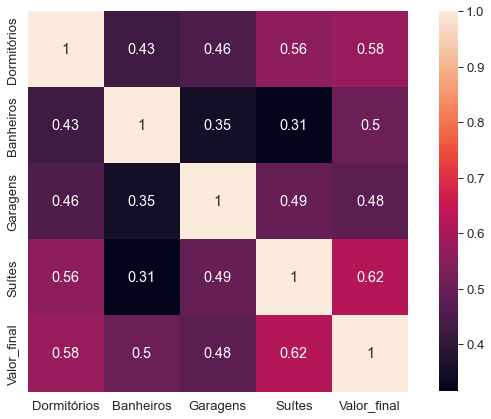

In [194]:
#correlation matrix
sns.set_context('paper', font_scale=1.5)
corrmat = df.corr()
f, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(corrmat, square=True, annot=True);

In [195]:
df.loc[df['Valor_final'] > 30000] 

,Tipo,Dormitórios,Banheiros,Garagens,Bairro,Suítes,Mobiliado,Valor_final
835,Casa,5,6,4,Centro,4,Não,38889.0


In [196]:
df.drop(index=835, inplace=True) #valor muito fora do comum que pode alterar o modelo, portanto, será retirado

In [197]:
df.shape

(1166, 8)

In [198]:
df

,Tipo,Dormitórios,Banheiros,Garagens,Bairro,Suítes,Mobiliado,Valor_final
0,Apartamento,1,1,2,Jardim Paraíso,0,Sim,1400.0
1,Casa,3,1,3,Jardim Embaré,1,Não,1667.0
2,Apartamento,2,1,1,Vila Celina,0,Não,1334.0
3,Casa,1,1,1,Jardim Social Presidente Collor,0,Não,556.0
4,Casa,3,1,1,Vila Faria,1,Sim,2223.0
...,...,...,...,...,...,...,...,...
1387,Apartamento,2,2,1,Vila Monteiro Gleba I,0,Sim,1650.0
1388,Casa,3,1,1,Jardim Cruzeiro do Sul,1,Sim,1640.0
1389,Casa,4,3,1,Centro,0,Sim,3000.0
1390,Apartamento,1,1,1,Cidade Jardim,0,Sim,800.0


C:\Users\naomy\AppData\Local\Temp/ipykernel_7120/3938461783.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  barplot = df.groupby(['Tipo'], as_index=False).mean()[['Tipo', 'Valor_final']]


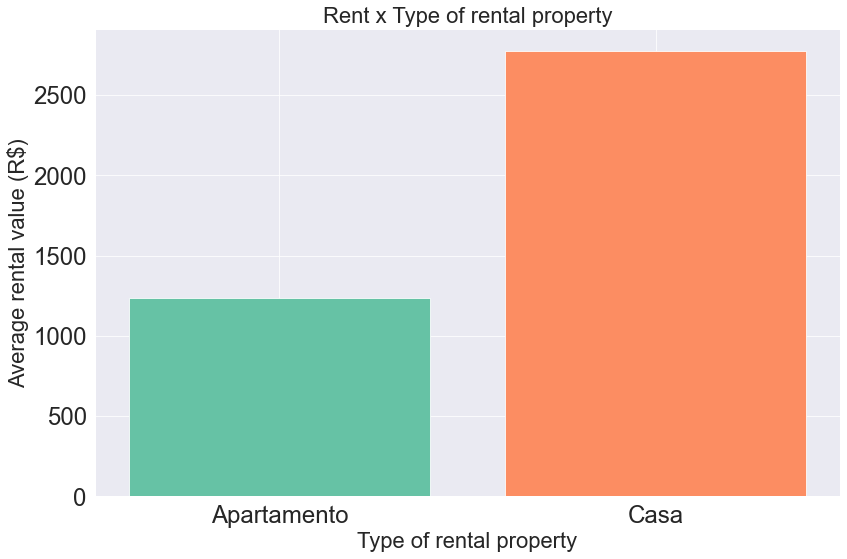

In [199]:
barplot = df.groupby(['Tipo'], as_index=False).mean()[['Tipo', 'Valor_final']]
sns.set_style("darkgrid")
plt.figure(figsize=(12,8), tight_layout=True)
colors = sns.color_palette('Set2')
plt.bar(barplot['Tipo'], barplot['Valor_final'], color=colors[:5])
plt.xlabel('Type of rental property', fontsize=22)
plt.ylabel('Average rental value (R$)', fontsize=22)
plt.title('Rent x Type of rental property', fontsize=22)
plt.tick_params(axis="both", labelsize=24)
plt.savefig("img1.pdf")
plt.show()

[Text(0.5, 0, 'Type of rental property'), Text(0, 0.5, 'Rental value (R$)')]

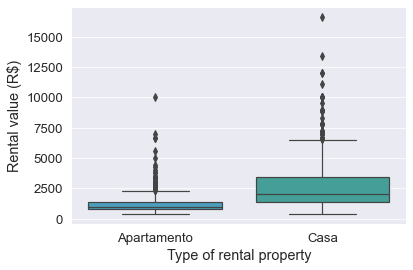

In [150]:
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=1.5)
sns.set_palette(['#39A7D0', '#36ADA4'])

g = sns.boxplot(data=df, x='Tipo', y='Valor_final')
g.set(xlabel="Type of rental property", ylabel="Rental value (R$)")
#plt.savefig('boxplot_tipo.pdf', dpi=300, bbox_inches='tight')

C:\Users\naomy\AppData\Local\Temp/ipykernel_7120/2910563043.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  barplot2 = df.groupby(['Dormitórios'], as_index=False).mean()[['Dormitórios', 'Valor_final']]


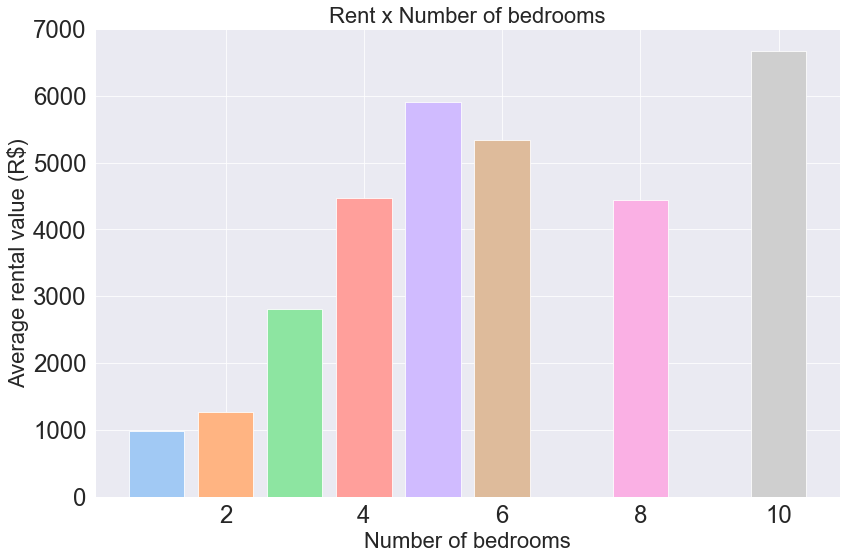

In [200]:
barplot2 = df.groupby(['Dormitórios'], as_index=False).mean()[['Dormitórios', 'Valor_final']]

plt.figure(figsize=(12,8), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(barplot2['Dormitórios'], barplot2['Valor_final'], color=colors[:11])
plt.xlabel('Number of bedrooms', fontsize=22)
plt.ylabel('Average rental value (R$)', fontsize=22)
plt.title('Rent x Number of bedrooms', fontsize=22)
plt.tick_params(axis="both", labelsize=24)
#plt.savefig("img2.pdf")
plt.show()

In [201]:
df['Dormitórios'].value_counts()

2     536
3     282
1     244
4      72
5      25
6       5
8       1
10      1
Name: Dormitórios, dtype: int64

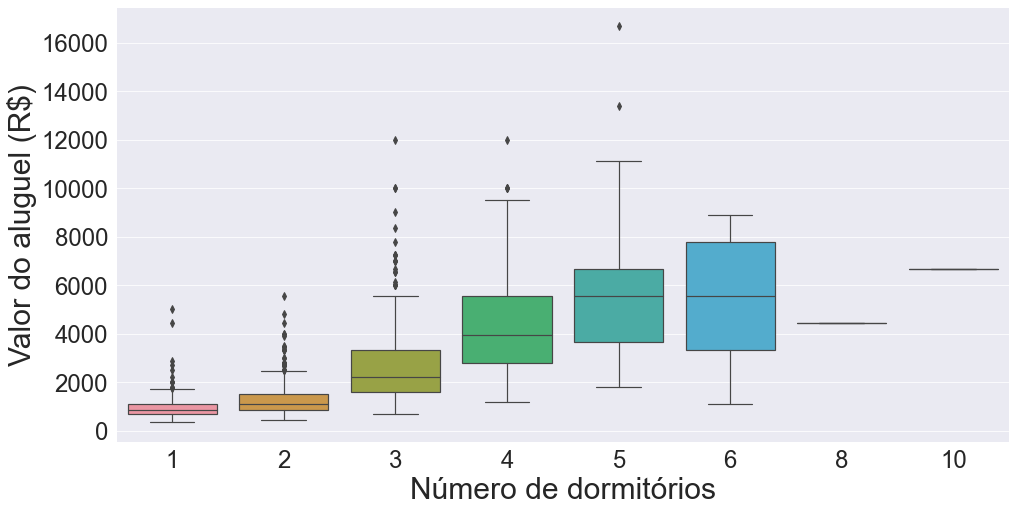

In [202]:
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=10)
sns.set_palette(['#39A7D0', '#36ADA4'])
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df, x='Dormitórios', y='Valor_final')
ax.set_xlabel("Número de dormitórios", fontsize=30)
ax.set_ylabel("Valor do aluguel (R$)", fontsize=30)
ax.tick_params(axis="both", labelsize=24)

C:\Users\naomy\AppData\Local\Temp/ipykernel_7120/1806773399.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  barplot3 = df.groupby(['Mobiliado'], as_index=False).mean()[['Mobiliado', 'Valor_final']]


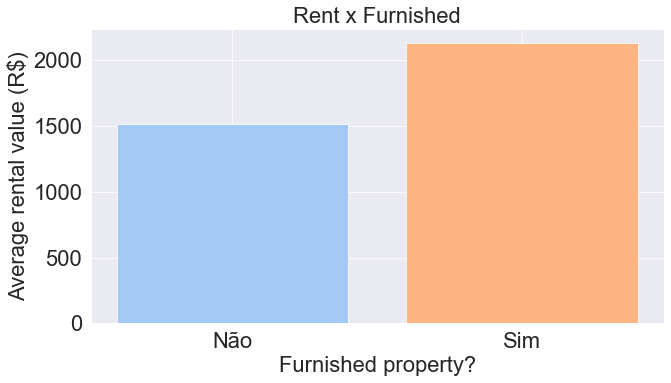

In [203]:
barplot3 = df.groupby(['Mobiliado'], as_index=False).mean()[['Mobiliado', 'Valor_final']]

plt.figure(figsize=(12,8), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(barplot3['Mobiliado'], barplot3['Valor_final'], color=colors[:5])
plt.xlabel('Furnished property?', fontsize=22)
plt.ylabel('Average rental value (R$)', fontsize=22)
plt.title('Rent x Furnished', fontsize=22)
plt.tick_params(axis="both", labelsize=22)
#plt.savefig("img3.pdf")
plt.show()

C:\Users\naomy\AppData\Local\Temp/ipykernel_7120/271908645.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  barplot4 = df.groupby(['Suítes'], as_index=False).mean()[['Suítes', 'Valor_final']]


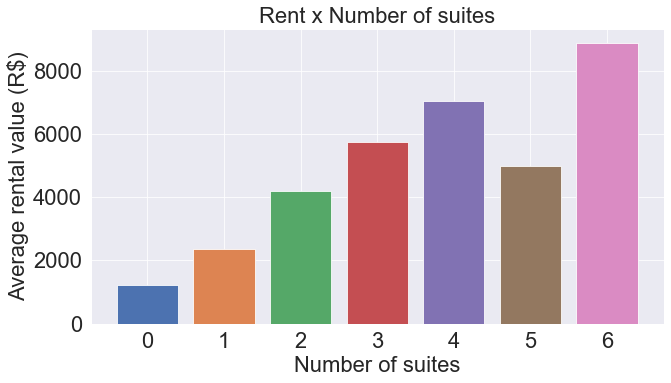

In [204]:
barplot4 = df.groupby(['Suítes'], as_index=False).mean()[['Suítes', 'Valor_final']]

plt.figure(figsize=(12,8), tight_layout=True)
colors = sns.color_palette('deep')
plt.bar(barplot4['Suítes'], barplot4['Valor_final'], color=colors[:7])
plt.xlabel('Number of suites', fontsize=22)
plt.ylabel('Average rental value (R$)', fontsize=22)
plt.title('Rent x Number of suites', fontsize=22)
#plt.savefig("img4.pdf")
plt.tick_params(axis="both", labelsize=22)
plt.show()

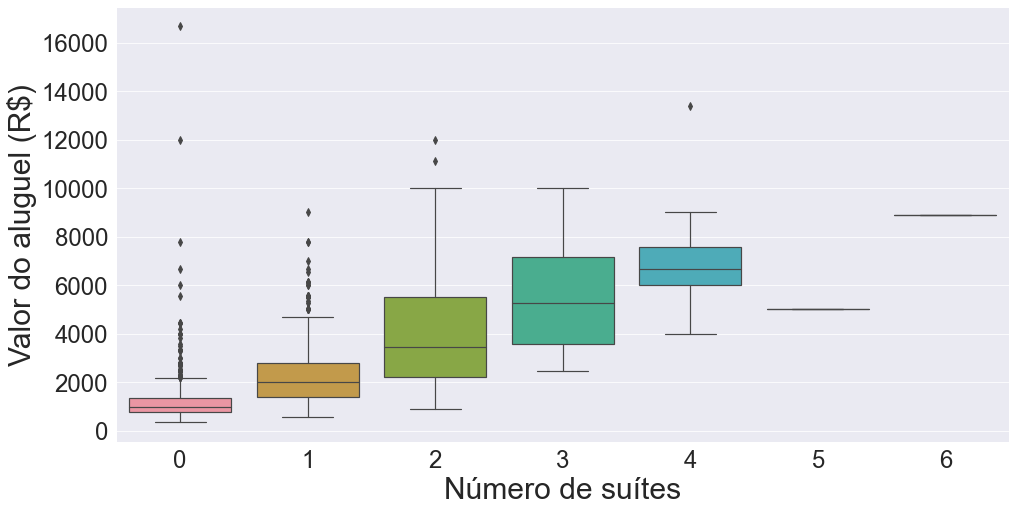

In [50]:
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=10)
sns.set_palette(['#39A7D0', '#36ADA4'])
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df, x='Suítes', y='Valor_final')
ax.set_xlabel("Número de suítes", fontsize=30)
ax.set_ylabel("Valor do aluguel (R$)", fontsize=30)
ax.tick_params(axis="both", labelsize=24)

In [51]:
df['Suítes'].value_counts()

0    705
1    362
2     53
3     30
4     14
5      1
6      1
Name: Suítes, dtype: int64

C:\Users\naomy\AppData\Local\Temp/ipykernel_7120/1667775902.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  barplot5 = df.groupby(['Banheiros'], as_index=False).mean()[['Banheiros', 'Valor_final']]


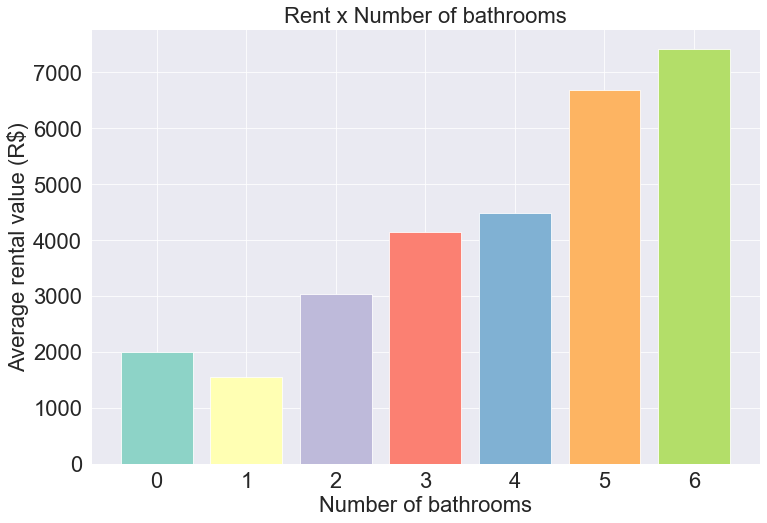

In [205]:
barplot5 = df.groupby(['Banheiros'], as_index=False).mean()[['Banheiros', 'Valor_final']]

plt.figure(figsize=(12,8))
colors = sns.color_palette('Set3')
plt.bar(barplot5['Banheiros'], barplot5['Valor_final'], color=colors[:7])
plt.xlabel('Number of bathrooms', fontsize=22)
plt.ylabel('Average rental value (R$)', fontsize=22)
plt.title('Rent x Number of bathrooms', fontsize=22)
#plt.savefig("img5.pdf")
plt.tick_params(axis="both", labelsize=22)
plt.show()

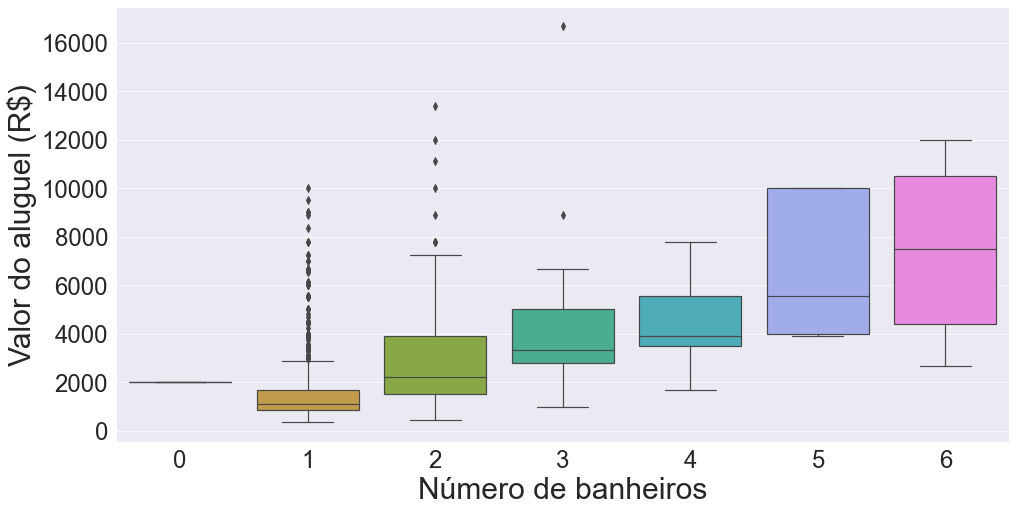

In [53]:
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=10)
sns.set_palette(['#39A7D0', '#36ADA4'])
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df, x='Banheiros', y='Valor_final')
ax.set_xlabel("Número de banheiros", fontsize=30)
ax.set_ylabel("Valor do aluguel (R$)", fontsize=30)
ax.tick_params(axis="both", labelsize=24)

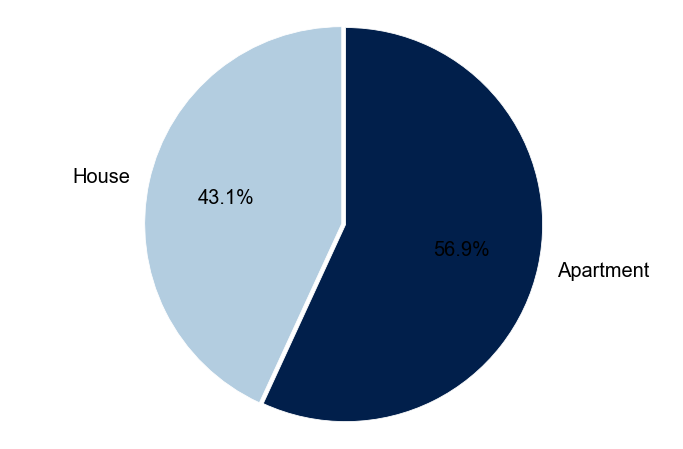

In [206]:
labels = 'House', 'Apartment'
colors = ['#b3cde0', '#011f4b']
sizes = [df.Tipo[df['Tipo']=='Casa'].count(), df.Tipo[df['Tipo']=='Apartamento'].count()]
explode = (0, 0.02)  
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%'
        , startangle=90, colors=colors, textprops={'fontsize': 20,  'family': 'sans-serif', 'color':'black'})
ax1.axis('equal') 
plt.show()

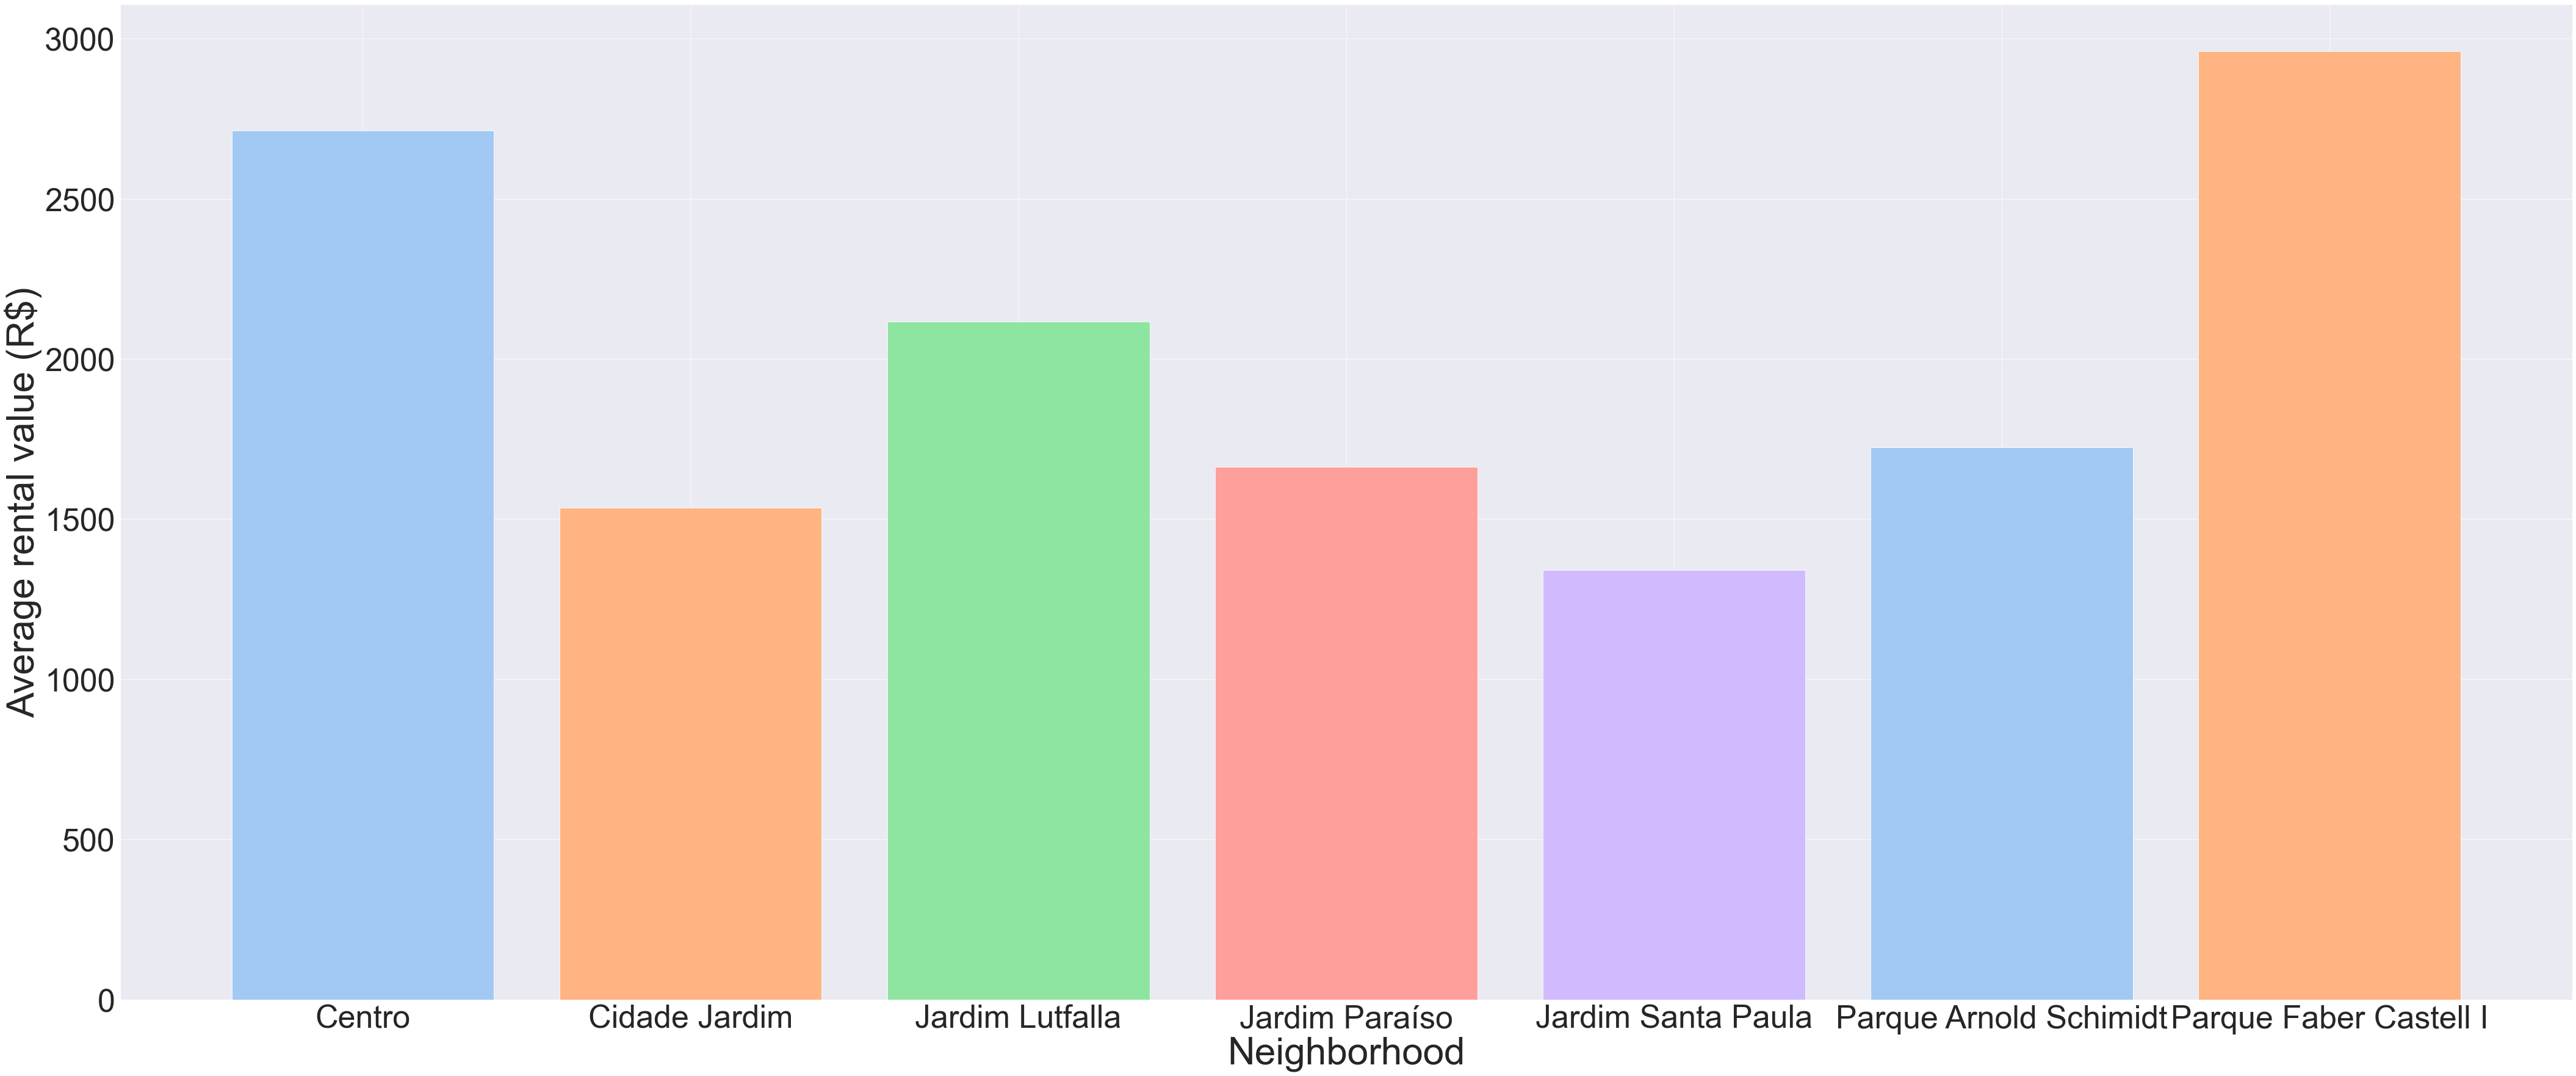

In [210]:
bairros_desejados = ['Centro', 'Jardim Lutfalla', 'Parque Arnold Schimidt', 'Cidade Jardim', 
'Jardim Santa Paula', 'Jardim Paraíso', 'Parque Faber Castell I']
df_bairros = df.groupby('Bairro', as_index=False)['Valor_final'].mean().sort_values(by=['Bairro'])[['Bairro', 'Valor_final']]
barplot6 = df_bairros[df_bairros['Bairro'].isin(bairros_desejados)]

#sns.set_context('paper', font_scale=10)

plt.figure(figsize=(72,30))
colors = sns.color_palette('pastel')
plt.bar(barplot6['Bairro'], barplot6['Valor_final'], color=colors[:5])
plt.xlabel('Neighborhood', fontsize=62)
plt.ylabel('Average rental value (R$)', fontsize=62)
#plt.title('Aluguel x Principais Bairros', fontsize=35)
#plt.savefig("img6.pdf")
plt.tick_params(axis="both", labelsize=52)
plt.show()

In [56]:
# import os
# import glob
# import pandas as pd
# #list all csv files only
# csv_files = glob.glob('*.{}'.format('csv'))
# csv_files

In [57]:
# df_concat = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)
# df_concat

In [58]:
# df_concat.drop(columns="Unnamed: 0", inplace=True)
# df_concat.head()

In [59]:
# df_concat.duplicated().sum()

In [60]:
# df_concat.drop_duplicates(inplace=True)
# df_concat.shape

In [61]:
# df_concat['Bairro'] = df_concat['Bairro'].str.lstrip()
# df_concat.head()

In [62]:
# df_concat.to_csv('tabela_aluguel_completa_maio.csv')

c:\Users\naomy\anaconda3\lib\site-packages\seaborn\distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


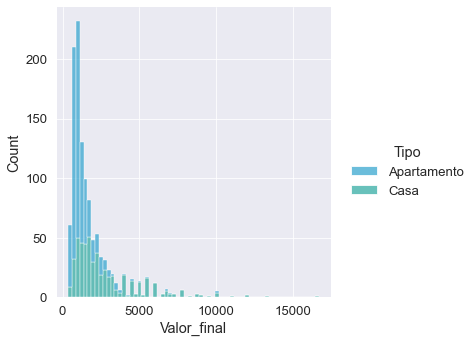

In [211]:
sns.set_context('paper', font_scale=1.5)
sns.displot(data=df, x="Valor_final", hue="Tipo", multiple="stack")

In [212]:
df['Valor_final'].max(), df['Valor_final'].min()

(16667.0, 367.0)

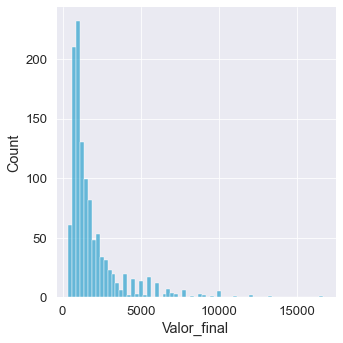

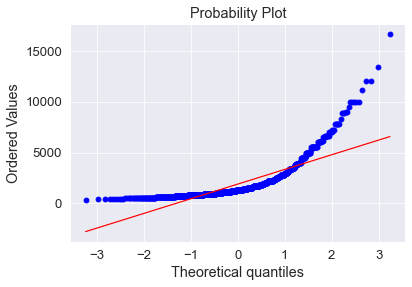

In [213]:
from scipy.stats import norm
from scipy import stats


sns.displot(df['Valor_final']);
fig = plt.figure()
res = stats.probplot(df['Valor_final'], plot=plt)

In [214]:
#applying log transformation
df['Valor_final'] = np.log1p(df['Valor_final'])

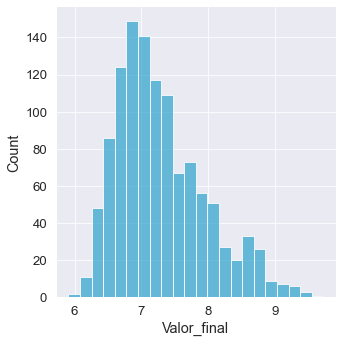

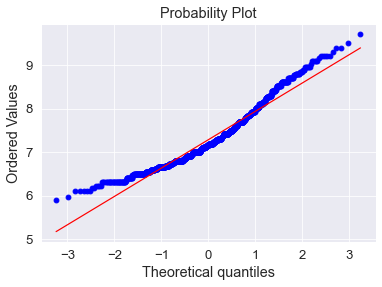

In [215]:
sns.displot(df['Valor_final']);
fig = plt.figure()
res = stats.probplot(df['Valor_final'], plot=plt)

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separate target from predictors
y = df['Valor_final']
X = df.drop(['Valor_final'], axis=1)


# Divide data into training and validation subsets
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

# Selecting categorical columns
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].dtype.name in ["category"]] 

# Selecting numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy() #test data

categorical_cols, numerical_cols

(['Tipo', 'Bairro', 'Mobiliado'],
 ['Dormitórios', 'Banheiros', 'Garagens', 'Suítes'])

In [69]:
X_train.head()

,Tipo,Bairro,Mobiliado,Dormitórios,Banheiros,Garagens,Suítes
696,Casa,Vila Boa Vista I,Sim,3,2,1,1
1344,Apartamento,Jardim Gibertoni,Não,1,1,1,0
774,Apartamento,Jardim Bethânia,Sim,2,1,2,0
987,Casa,Vila Costa do Sol,Sim,5,1,4,2
976,Apartamento,Parque Fehr,Sim,2,1,1,0


In [70]:
y_train.head()

696     7.707063
1344    7.313887
774     7.014814
987     8.006701
976     6.504288
Name: Valor_final, dtype: float64

In [71]:
# Preprocessing data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

In [73]:
def plot_graphs(y_test, preds, title):
    fig = plt.figure()
    l = plt.plot(preds, y_test, 'bo')
    plt.setp(l, markersize=5)
    plt.setp(l, markerfacecolor='C0')

    plt.ylabel("Valores reais de teste (R$)", fontsize=15)
    plt.xlabel("Valores preditos (R$)", fontsize=15)

# mostra os valores preditos e originais
    xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
    yl = xl
    plt.plot(xl, yl, 'r--')
    plt.title(title)

    plt.show(True)

In [74]:

# Define regressors and parameters for GridSearchCV
regressors = [
    LinearRegression(),
    SVR(),
    RandomForestRegressor(),
    XGBRegressor(),
    KNeighborsRegressor(),
    MLPRegressor()
]

params = [
    {
        'regressor__fit_intercept': [True, False]
    },
    {
        'regressor__C': [0.5, 1, 1.5, 2, 2.5, 3],
        'regressor__epsilon': [0.1, 0.2, 0.3, 0.4, 0.5]
    },
    {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 5, 10],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__max_features': ['sqrt', 'log2']
    },
    {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__eta': [0.1, 0.3, 0.5, 0.7],
        'regressor__gamma': [0, 0.5, 1, 2]
    },
    {
        'regressor__n_neighbors': [3, 5, 7, 9, 11],
        'regressor__weights': ['uniform', 'distance'],
        'regressor__p': [1,2]
    },
    {
        'regressor__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
        'regressor__activation': ['relu', 'tanh'],
        'regressor__solver': ['adam', 'lbfgs'],
        'regressor__alpha': [0.0001, 0.001, 0.01],
    }
]

scorer = make_scorer(r2_score)
# Create pipeline for each regressor and preprocessor
pipelines = []
for regressor in regressors:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    pipelines.append(pipeline)

# Run GridSearchCV for each pipeline and regressor
for i, pipeline in enumerate(pipelines):
    grid = GridSearchCV(pipeline, params[i], cv=5, scoring=scorer)
    grid.fit(X_train, y_train)
    print(f"Best parameters for {type(regressors[i]).__name__}: {grid.best_params_}")
    print(f"Train score for {type(regressors[i]).__name__}: {grid.best_score_:.4f}")
    print(f"Test score for {type(regressors[i]).__name__}: {grid.score(X_test, y_test):.4f}")

Best parameters for LinearRegression: {'regressor__fit_intercept': True}
Train score for LinearRegression: 0.7091
Test score for LinearRegression: 0.7813
Best parameters for SVR: {'regressor__C': 1, 'regressor__epsilon': 0.2}
Train score for SVR: 0.7190
Test score for SVR: 0.7930
Best parameters for RandomForestRegressor: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Train score for RandomForestRegressor: 0.7282
Test score for RandomForestRegressor: 0.7646
Best parameters for XGBRegressor: {'regressor__eta': 0.1, 'regressor__gamma': 0, 'regressor__n_estimators': 200}
Train score for XGBRegressor: 0.7260
Test score for XGBRegressor: 0.7925
Best parameters for KNeighborsRegressor: {'regressor__n_neighbors': 9, 'regressor__p': 1, 'regressor__weights': 'uniform'}
Train score for KNeighborsRegressor: 0.6943
Test score for KNeighborsRegressor: 0.7679


c:\Users\naomy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\naomy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\naomy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\naomy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\naomy\anaconda3\lib\site-packages\sklearn\neural_network\_multi

KeyboardInterrupt: 

In [75]:
# Bundle preprocessing and modeling code in a pipeline
xgb = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', XGBRegressor(n_estimators = 200, eta = 0.1, gamma = 0, eval_metric= 'mae'))
                                ])

# Preprocessing of training data, fit model
xgb.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds3 = xgb.predict(X_test)

In [76]:
# Access the final estimator from the pipeline
final_estimator = xgb['model']

# Check if the final estimator supports feature importances
if hasattr(final_estimator, 'feature_importances_'):
    feature_importances = final_estimator.feature_importances_
else:
    feature_importances = None

# Print feature importances
if feature_importances is not None:
    for feature, importance in zip(X.columns, feature_importances):
        print(f'{feature}: {importance}')
else:
    print("Feature importances not available for this model.")


#OBS: Feature Interactions: XGBoost can capture complex interactions between features. If your dataset contains interactions or non-linear relationships between features, 
#the individual feature importances may appear low, as the model assigns higher importance to combinations of features rather than individual ones.

Tipo: 0.02672009915113449
Dormitórios: 0.0
Banheiros: 0.002453973749652505
Garagens: 0.004242623224854469
Bairro: 0.0
Suítes: 0.0033300186041742563
Mobiliado: 0.010001291520893574


In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test, preds3))
print('MSE:', mean_squared_error(y_test, preds3))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds3)))
print('R2:', r2_score(y_test, preds3))

MAE: 0.2417930443207838
MSE: 0.1010875298047662
RMSE: 0.31794265175463043
R2: 0.792530707572793


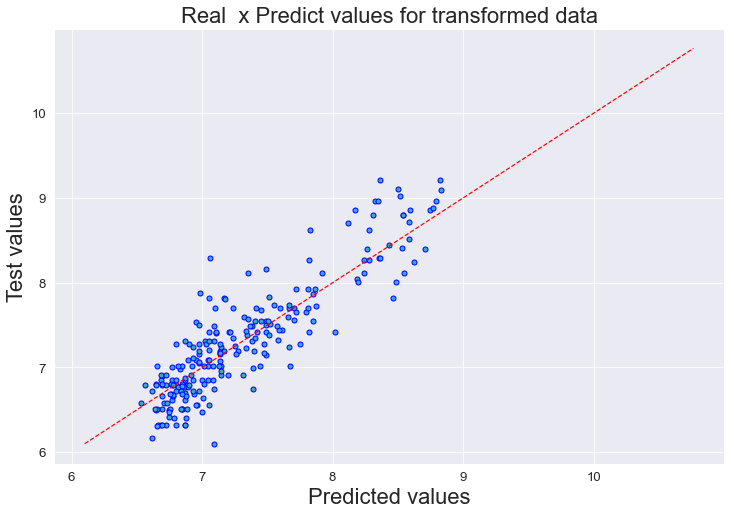

In [81]:
#plot_graphs(y_test, preds3, "Real  x Predict values for transformed data")
fig = plt.figure(figsize=(12,8))
l = plt.plot(preds3, y_test, 'bo')
plt.setp(l, markersize=5)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Test values", fontsize=22)
plt.xlabel("Predicted values", fontsize=22)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.title("Real  x Predict values for transformed data", fontsize=22)

plt.show(True)

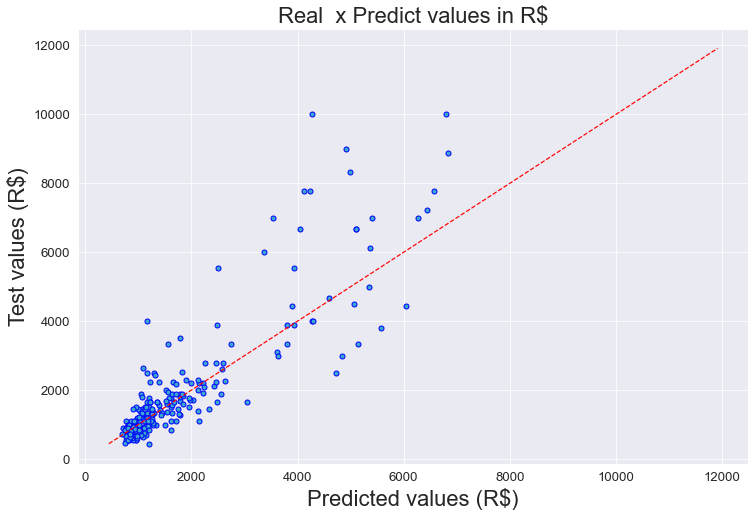

In [84]:
real_preds3 = np.expm1(preds3) #predições do modelo (em R$)
y_real = np.expm1(y_test) #valores reais usados no teste (em R$)

#plot_graphs(y_test, preds3, "Real  x Predict values for transformed data")
fig = plt.figure(figsize=(12,8))
l = plt.plot(real_preds3, y_real, 'bo')
plt.setp(l, markersize=5)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Test values (R$)", fontsize=22)
plt.xlabel("Predicted values (R$)", fontsize=22)

# mostra os valores preditos e originais
xl = np.arange(min(y_real), 1.2*max(y_real),(max(y_real)-min(y_real))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.title("Real  x Predict values in R$", fontsize=22)

plt.show(True)

In [ ]:
y_true = y_real.values


In [ ]:
real_preds3

array([4124.5435 , 4272.993  , 6276.9375 , 1548.1569 , 1052.9436 ,
        937.8543 , 1094.8767 , 6797.2397 , 4047.5352 , 1792.7566 ,
        962.7468 , 1073.4023 , 1212.6816 , 1146.1259 , 1198.3845 ,
       1636.0529 , 1788.1276 , 1158.4613 ,  708.6373 , 1611.6283 ,
        851.0851 , 1295.1646 , 4839.4326 , 1154.807  , 5066.889  ,
       5103.0923 , 2129.988  , 2219.9873 , 1074.0521 , 4726.474  ,
       2221.9622 ,  962.7468 , 1254.7347 , 1515.8685 , 1143.6932 ,
       1042.7615 , 1066.4065 ,  851.0851 ,  962.7468 , 1619.6415 ,
        964.7783 ,  937.8543 , 2460.4434 ,  962.7468 ,  802.17175,
       1111.1045 , 6044.609  ,  897.1896 , 1158.4613 , 2328.2444 ,
       1787.9978 , 5142.256  , 1073.2405 , 3793.161  , 4264.8735 ,
        805.8445 , 1336.114  ,  928.1804 , 1073.2405 ,  868.4136 ,
       1255.2786 ,  932.20416, 1011.84973, 1080.8546 ,  962.7468 ,
        972.93665, 1042.7615 , 1407.4204 , 1309.2556 , 1021.49866,
       4236.3896 , 6834.6865 , 2430.0852 , 1447.3359 ,  773.02

In [ ]:
print('MAE:', mean_absolute_error(y_true, real_preds3))
print('MSE:', mean_squared_error(y_true, real_preds3))
print('RMSE:', np.sqrt(mean_squared_error(y_true, real_preds3)))
print('R2:', r2_score(y_true, real_preds3))

MAE: 517.769845886752
MSE: 910429.4709074053
RMSE: 954.1642787840075
R2: 0.7419429225173118


Análise de diagnóstico de resíduos: verificando se os resíduos não possuem padrões

In [ ]:
def plot_residuals(y_real, preds):
    y = y_real-preds #resíduos: v
    fig = plt.figure()
    l = plt.plot(preds, y, 'bo')
    plt.setp(l, markersize=5)
    plt.setp(l, markerfacecolor='C0')

    plt.ylabel("Resíduos (R$)", fontsize=15)
    plt.xlabel("Valores preditos (R$)", fontsize=15)
    plt.title("Gráfico de resíduos x Valores preditos")

    plt.show(True)

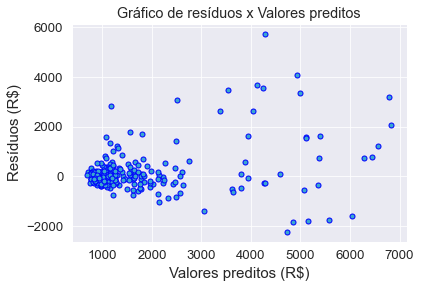

In [ ]:
plot_residuals(y_true, real_preds3)

In [ ]:
from statsmodels.formula.api import ols
X = df[['Tipo', 'Dormitórios', 'Banheiros',	'Garagens',	'Bairro', 'Suítes',	'Mobiliado']].values

y = df['Valor_final'].values

#Ajusta o modelo de regressão linear múltipla para o preço das casas
modelo = ols('Valor_final ~ Tipo + Dormitórios + Banheiros + Garagens + Bairro + Suítes + Mobiliado',data=df)

res = modelo.fit()
print(res.summary())

#valor p pequeno (próximo de 0) indica que as variáveis em questão não podem ser excluídas, que elas são importantes pro modelo 

                            OLS Regression Results                            
Dep. Variable:            Valor_final   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     26.66
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          1.89e-268
Time:                        10:36:54   Log-Likelihood:                -230.54
No. Observations:                1166   AIC:                             775.1
Df Residuals:                    1009   BIC:                             1570.
Df Model:                         156                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

## Análise univariada

In [ ]:
df['Bairro'].nunique()

151

In [ ]:
df['Bairro'].value_counts().head(50)

Centro                                    138
Cidade Jardim                              42
Parque Santa Felícia Jardim                41
Jardim Sao Carlos                          36
Jardim Paraíso                             36
Parque Arnold Schimidt                     33
Jardim Ipanema                             32
Parque Faber Castell I                     31
Jardim Santa Paula                         30
Vila Monteiro Gleba I                      26
Jardim Embaré                              25
Jardim Lutfalla                            21
Parque Fehr                                20
Jardim Nova Sao Carlos                     20
Vila Rancho Velho                          20
Jardim Alvorada                            20
Núcleo Residencial Silvio Vilar            19
Recreio São Judas Tadeu                    18
Jardim Gibertoni                           18
Jardim Tangará                             18
Vila Costa do Sol                          17
Jardim Brasil                     

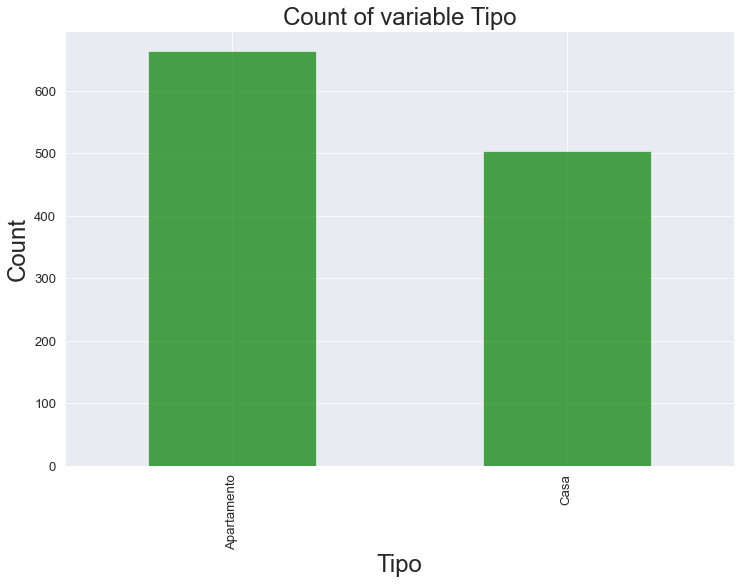

Apartamento    663
Casa           503
Name: Tipo, dtype: int64


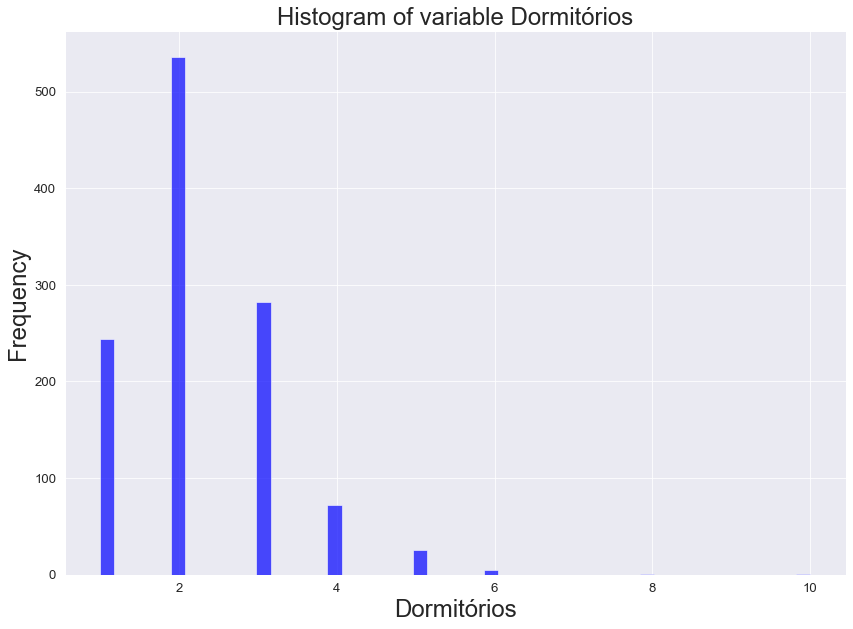

count    1166.000000
mean        2.249571
std         0.991974
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: Dormitórios, dtype: float64


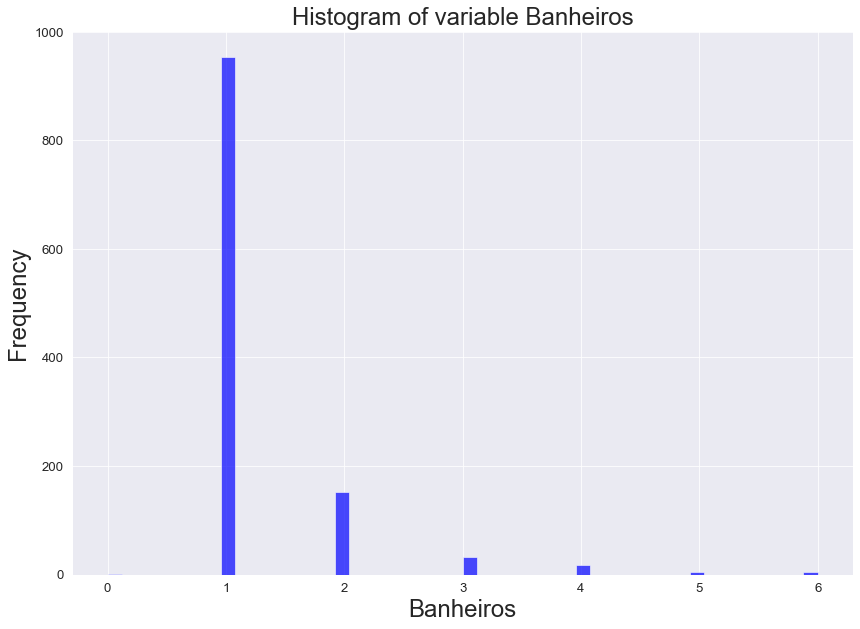

count    1166.000000
mean        1.264151
std         0.678702
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: Banheiros, dtype: float64


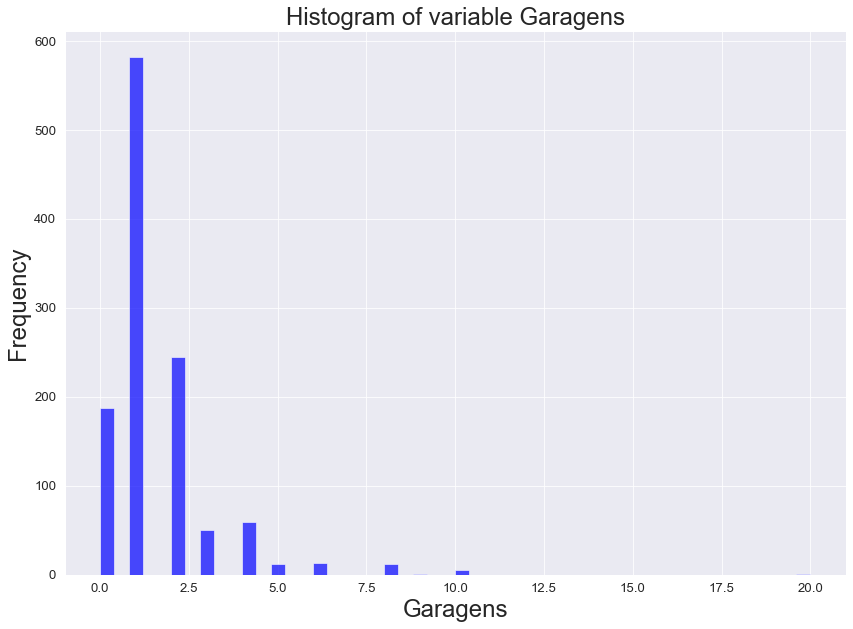

count    1166.000000
mean        1.517153
std         1.546186
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        20.000000
Name: Garagens, dtype: float64


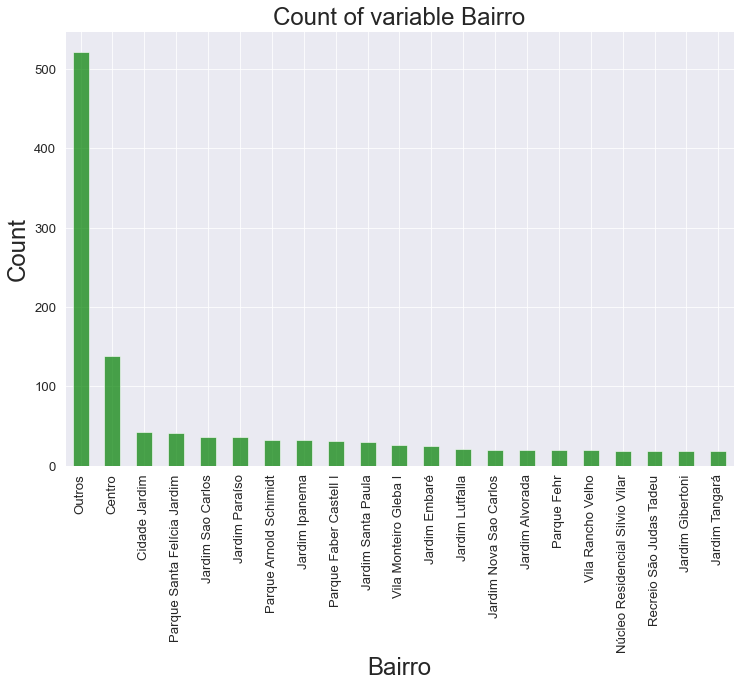

Outros                             522
Centro                             138
Cidade Jardim                       42
Parque Santa Felícia Jardim         41
Jardim Sao Carlos                   36
Jardim Paraíso                      36
Parque Arnold Schimidt              33
Jardim Ipanema                      32
Parque Faber Castell I              31
Jardim Santa Paula                  30
Vila Monteiro Gleba I               26
Jardim Embaré                       25
Jardim Lutfalla                     21
Jardim Nova Sao Carlos              20
Jardim Alvorada                     20
Parque Fehr                         20
Vila Rancho Velho                   20
Núcleo Residencial Silvio Vilar     19
Recreio São Judas Tadeu             18
Jardim Gibertoni                    18
Jardim Tangará                      18
Name: Bairro, dtype: int64


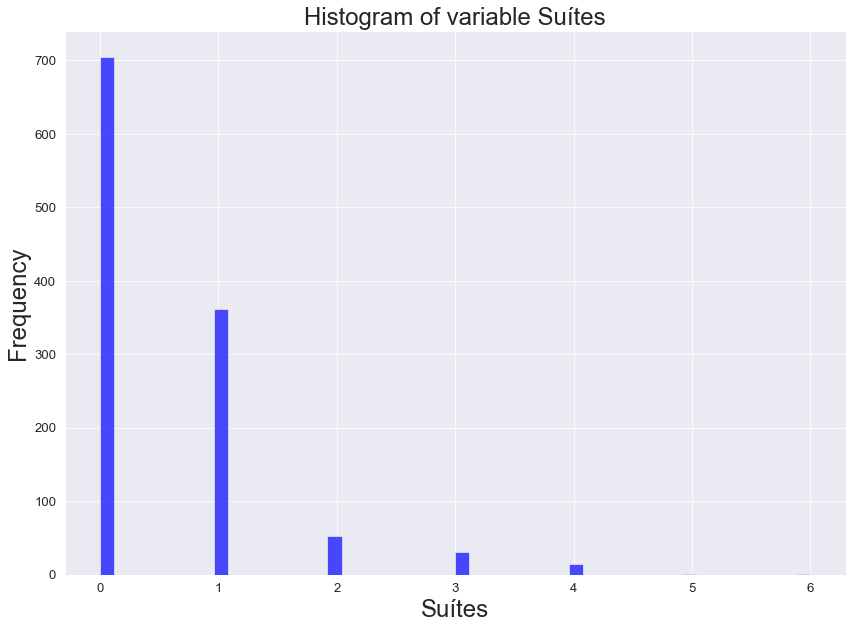

count    1166.000000
mean        0.536021
std         0.825551
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         6.000000
Name: Suítes, dtype: float64


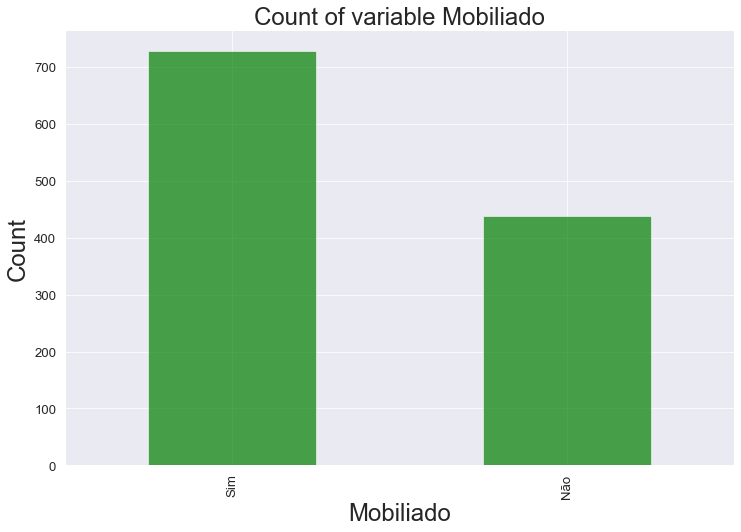

Sim    728
Não    438
Name: Mobiliado, dtype: int64


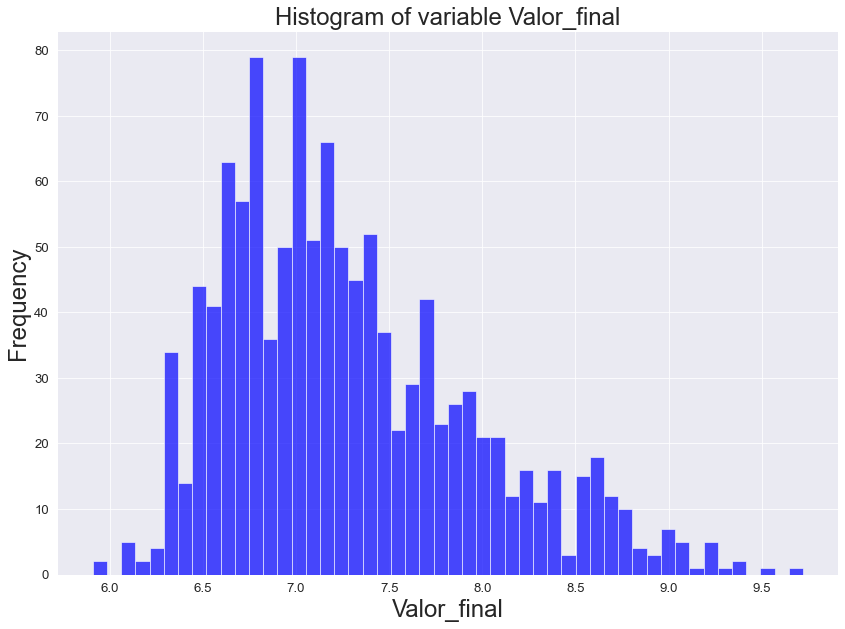

count    1166.000000
mean        7.287867
std         0.667607
min         5.908083
25%         6.791221
50%         7.170888
75%         7.707063
max         9.721246
Name: Valor_final, dtype: float64


In [216]:
#padronizando os bairros com poucos imóveis para a análise estatística
frequencia_bairros = df['Bairro'].value_counts()
top_20_bairros = frequencia_bairros.head(20).index
df['Bairro'] = df['Bairro'].apply(lambda x: x if x in top_20_bairros else 'Outros')


# Listar as colunas do dataset
colunas = df.columns

# Iterar sobre as colunas e criar gráficos univariados
for coluna in colunas:
    # Verificar se a coluna contém dados numéricos
    if df[coluna].dtype in ['int64', 'float64']:
        # Criar um histograma para variáveis numéricas
        plt.figure(figsize=(14, 10))
        plt.hist(df[coluna], bins=50, color='blue', alpha=0.7)
        plt.title(f'Histogram of variable {coluna}', fontsize=24)
        plt.xlabel(coluna, fontsize=24)
        plt.ylabel('Frequency', fontsize=24)
        plt.show()
        
        # Calcular estatísticas descritivas para a variável
        descricao = df[coluna].describe()
        print(descricao)
        
    else:
        # Criar um gráfico de barra para variáveis categóricas
        plt.figure(figsize=(12, 8))
        df[coluna].value_counts().plot(kind='bar', color='green', alpha=0.7)
        plt.title(f'Count of variable {coluna}', fontsize=24)
        plt.xlabel(coluna, fontsize=24)
        plt.ylabel('Count', fontsize=24)
        plt.show()
        
        # Mostrar os valores únicos e suas contagens
        contagem_valores = df[coluna].value_counts()
        print(contagem_valores)

# Para cada variável numérica, um histograma é exibido juntamente com estatísticas descritivas.
# Para cada variável categórica, um gráfico de barra é exibido com os valores únicos e suas contagens.


(array([187.,   0., 582.,   0.,   0., 244.,   0.,  50.,   0.,   0.,  59.,
          0.,  12.,   0.,   0.,  13.,   0.,   0.,   0.,   0.,  12.,   0.,
          1.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
        17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. ]),
 <BarContainer object of 50 artists>)

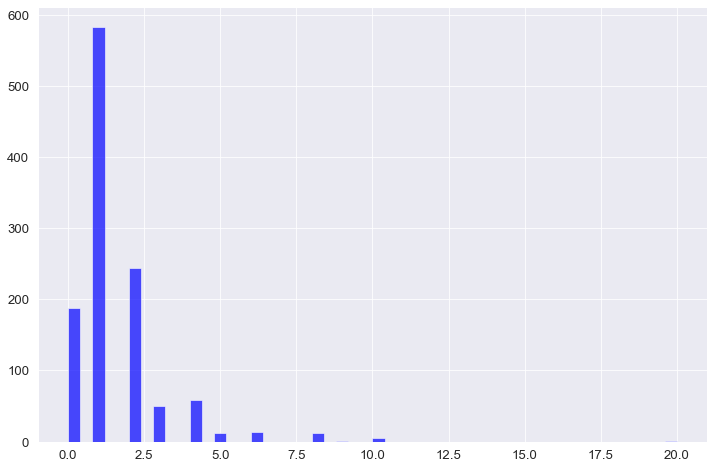

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(df['Garagens'], bins=50, color='blue', alpha=0.7)

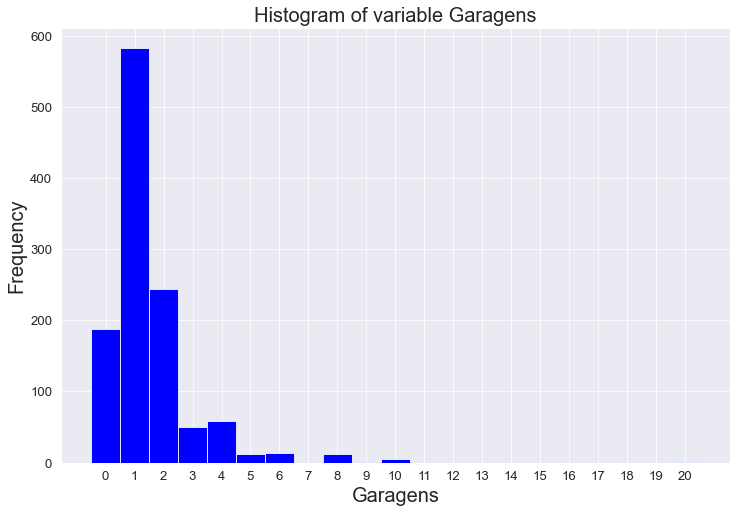

In [87]:
coluna = 'Garagens'
plt.figure(figsize=(12, 8))

# Defina bins para representar explicitamente os valores inteiros
bins = np.arange(df[coluna].min(), df[coluna].max() + 1.5) - 0.5

plt.hist(df[coluna], bins=bins, color='blue')  # Adicione edgecolor para destacar bordas
plt.title(f'Histogram of variable {coluna}', fontsize=20)
plt.xlabel(coluna, fontsize=20)
plt.ylabel('Frequency', fontsize=20)

# Configure o eixo x para exibir apenas valores inteiros
plt.xticks(np.arange(df[coluna].min(), df[coluna].max() + 1))

plt.show()